In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mbuji-mayi
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | salalah
Processing Record 4 of Set 1 | jega
Processing Record 5 of Set 1 | katobu
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | mersing
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | ahuimanu
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | port-de-paix
City not found. Skipping...
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | puerto madryn
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | baoshan
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | bajos de haina
Processing Record 22 of Set 1 | vaitupu
City not fou

Processing Record 31 of Set 4 | faanui
Processing Record 32 of Set 4 | ondarroa
Processing Record 33 of Set 4 | akyab
Processing Record 34 of Set 4 | rognan
Processing Record 35 of Set 4 | coahuayana
Processing Record 36 of Set 4 | chuy
Processing Record 37 of Set 4 | benguela
Processing Record 38 of Set 4 | mukono
Processing Record 39 of Set 4 | atar
Processing Record 40 of Set 4 | felipe carrillo puerto
Processing Record 41 of Set 4 | la union
Processing Record 42 of Set 4 | queimadas
Processing Record 43 of Set 4 | independencia
Processing Record 44 of Set 4 | asfi
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | makung
City not found. Skipping...
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | srednekolymsk
Processing Record 49 of Set 4 | aklavik
Processing Record 50 of Set 4 | eldoret
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | kem
Processing Record 3 of Set 5 | bargal
City not

Processing Record 24 of Set 8 | chicama
Processing Record 25 of Set 8 | kasangulu
Processing Record 26 of Set 8 | haapiti
Processing Record 27 of Set 8 | yuncheng
Processing Record 28 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 29 of Set 8 | mikhaylovka
Processing Record 30 of Set 8 | sao felix do xingu
Processing Record 31 of Set 8 | jacareacanga
Processing Record 32 of Set 8 | weiser
Processing Record 33 of Set 8 | dzhebariki-khaya
Processing Record 34 of Set 8 | tarauaca
Processing Record 35 of Set 8 | atocha
Processing Record 36 of Set 8 | gohpur
Processing Record 37 of Set 8 | melo
Processing Record 38 of Set 8 | pevek
Processing Record 39 of Set 8 | skala fourkas
Processing Record 40 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 | lakes entrance
Processing Record 43 of Set 8 | odienne
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | umm kaddadah
Processing Recor

Processing Record 14 of Set 12 | meulaboh
Processing Record 15 of Set 12 | itoman
Processing Record 16 of Set 12 | maiduguri
Processing Record 17 of Set 12 | havre-saint-pierre
Processing Record 18 of Set 12 | mount gambier
Processing Record 19 of Set 12 | shurugwi
Processing Record 20 of Set 12 | flin flon
Processing Record 21 of Set 12 | klyuchi
Processing Record 22 of Set 12 | evensk
Processing Record 23 of Set 12 | kesennuma
City not found. Skipping...
Processing Record 24 of Set 12 | sola
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | crotone
Processing Record 27 of Set 12 | vila
Processing Record 28 of Set 12 | totskoye
Processing Record 29 of Set 12 | mackay
Processing Record 30 of Set 12 | xiongzhou
Processing Record 31 of Set 12 | khorramshahr
Processing Record 32 of Set 12 | povenets
Processing Record 33 of Set 12 | port macquarie
Processing Record 34 of Set 12 | atasu
Processing Record 35 of Set 12 | socorro
Processing Record 36 of Set 12 | sibolga
P

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mbuji-Mayi,-6.1500,23.6000,81.01,26,7,5.12,CD,2022-07-09 16:47:32
1,Kahului,20.8947,-156.4700,76.84,84,40,13.80,US,2022-07-09 16:44:25
2,Salalah,17.0151,54.0924,77.09,100,100,8.05,OM,2022-07-09 16:44:09
3,Jega,12.2175,4.3792,95.59,37,75,8.55,NG,2022-07-09 16:47:32
4,Katobu,-4.9408,122.5276,74.17,94,29,6.02,ID,2022-07-09 16:47:33
5,Dikson,73.5069,80.5464,33.19,89,33,7.43,RU,2022-07-09 16:43:39
6,Mersing,2.4312,103.8405,80.51,83,40,4.61,MY,2022-07-09 16:47:33
7,Puerto Ayora,-0.7393,-90.3518,75.16,97,89,8.01,EC,2022-07-09 16:44:45
8,Kapaa,22.0752,-159.3190,75.52,90,40,13.80,US,2022-07-09 16:44:44
9,Ahuimanu,21.4447,-157.8378,76.35,83,75,12.66,US,2022-07-09 16:47:33


In [13]:
# reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mbuji-Mayi,CD,2022-07-09 16:47:32,-6.1500,23.6000,81.01,26,7,5.12
1,Kahului,US,2022-07-09 16:44:25,20.8947,-156.4700,76.84,84,40,13.80
2,Salalah,OM,2022-07-09 16:44:09,17.0151,54.0924,77.09,100,100,8.05
3,Jega,NG,2022-07-09 16:47:32,12.2175,4.3792,95.59,37,75,8.55
4,Katobu,ID,2022-07-09 16:47:33,-4.9408,122.5276,74.17,94,29,6.02
5,Dikson,RU,2022-07-09 16:43:39,73.5069,80.5464,33.19,89,33,7.43
6,Mersing,MY,2022-07-09 16:47:33,2.4312,103.8405,80.51,83,40,4.61
7,Puerto Ayora,EC,2022-07-09 16:44:45,-0.7393,-90.3518,75.16,97,89,8.01
8,Kapaa,US,2022-07-09 16:44:44,22.0752,-159.3190,75.52,90,40,13.80
9,Ahuimanu,US,2022-07-09 16:47:33,21.4447,-157.8378,76.35,83,75,12.66


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
print(len(city_data_df))

554


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

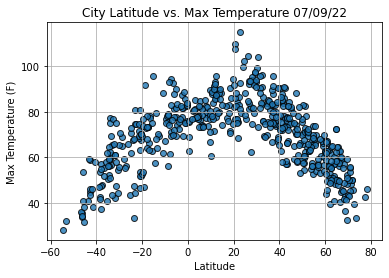

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

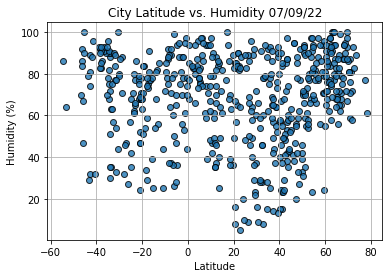

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

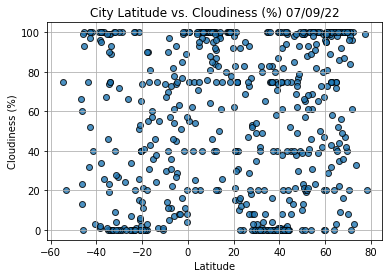

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

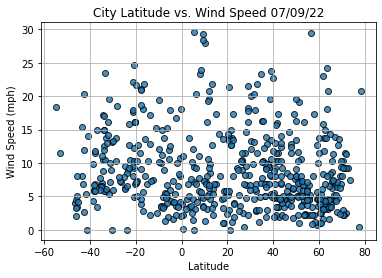

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()